# <img style="float: left; padding-right: 10px; width: 45px" src="iacs.png"> S-109A Introduction to Data Science 


## Lab 2: `numpy`,plotting, KNN Regression, Simple Linear Regression

**Harvard University**<br>
**Summer 2018**<br>
**Instructors:** Pavlos Protopapas and Kevin Rader<br>
**Lab Instructors:** David Sondak and Will Claybaugh

---

## <font color='red'> Run the cell below to properly highlight the exercises</font>

In [1]:
from IPython.display import HTML
style = "<style>div.exercise { background-color: #ffcccc;border-color: #E9967A; border-left: 5px solid #800080; padding: 0.5em;}</style>"
HTML(style)

# Table of Contents
<ol start="0">
  <li> Learning Goals </li>
  <li> `numpy` </li>
  <li> Creating plots </li>
  <li> Simple linear regression  </li>
  <li> $k$-nearest neighbors</li>
</ol>

## Learning Goals

Overall description and goal for the lab.

By the end of this lab, you should be able to:
* Use `numpy` proficiently and efficiently
* Make great, readable, informative plots with `matplotlib`
* Feel comfortable with simple linear regression
* Feel comfortable with $k$ nearest neighbors

**This lab corresponds to lecture 3 and maps on to homework 2 (and beyond).**

## <font color='red'> DO PART 1 BEFORE COMING TO LAB</font>

## Part 1: Numerical Python:  `numpy`
Scientific `Python` code uses a fast array structure, called the `numpy` array. Those who have worked in `Matlab` will find this very natural.   For reference, the `numpy` documention can be found here: [`numpy`](http://www.numpy.org/).  


Let's make a numpy array.

In [2]:
import numpy as np

In [3]:
my_array = np.array([1,4,9,16])
my_array

array([ 1,  4,  9, 16])

Numpy arrays support the same operations as lists! Below we compute length, slice, and iterate. 

In [4]:
print("len(array):", len(my_array)) # Length of array

print("array[2:4]:", my_array[2:4]) # A slice of the array

# Iterate over the array
for ele in my_array:
    print("element:", ele)

len(array): 4
array[2:4]: [ 9 16]
element: 1
element: 4
element: 9
element: 16


**In general you should manipulate numpy arrays by using numpy module functions** (e.g. `np.mean`). This is for efficiency purposes, and a discussion follows below this section.

You can calculate the mean of the array elements either by calling the method `.mean` on a numpy array or by applying the function `np.mean` with the `numpy` array as an argument.

In [5]:
# Two ways of calculating the mean

print(my_array.mean())

print(np.mean(my_array))

7.5
7.5


The way we constructed the `numpy` array above seems redundant. After all we already had a regular `python` list. Indeed, it is the other ways we have to construct `numpy` arrays that make them super useful. 

There are many such `numpy` array *constructors*. Here are some commonly used constructors. Look them up in the documentation.

In [6]:
zeros = np.zeros(10) # generates 10 floating point zeros
zeros

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

`Numpy` gains a lot of its efficiency from being strongly typed. That is, all elements in the array have the same type, such as integer or floating point. The default type, as can be seen above, is a float of size appropriate for the machine (64 bit on a 64 bit machine).

In [7]:
zeros.dtype

dtype('float64')

In [8]:
np.ones(10, dtype='int') # generates 10 integer ones

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Often you will want random numbers. Use the `random` constructor!

In [9]:
np.random.rand(10) # uniform on [0,1]

array([0.7541534 , 0.25898681, 0.42937074, 0.77508989, 0.75557664,
       0.45132106, 0.17618301, 0.69506555, 0.85333898, 0.460434  ])

You can generate random numbers from a normal distribution with mean $0$ and variance $1$ as follows:

In [10]:
normal_array = np.random.randn(1000000)
print("The sample mean and standard devation are {0:17.16f} and {1:17.16f}, respectively.".format(np.mean(normal_array), np.std(normal_array)))

The sample mean and standard devation are -0.0005217430082452 and 0.9996502296565319, respectively.


#### `numpy` supports vector operations

What does this mean? It means that to add two arrays instead of looping ovr each element (e.g. via a list comprehension as in base Python) you get to simply put a plus sign between the two arrays.

In [11]:
ones_array = np.ones(5)
twos_array = 2*np.ones(5)
ones_array + twos_array

array([3., 3., 3., 3., 3.])

Note that this behavior is very different from `python` lists, which just get longer when you try to + them.

In [12]:
first_list = [1., 1., 1., 1., 1.]
second_list = [1., 1., 1., 1., 1.]
first_list + second_list # not what you want

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

On some computer chips nunpy's addition actually happens in parallel, so speedups can be high. But even on regular chips, the advantage of greater readability is important.

`Numpy` supports a concept known as *broadcasting*, which dictates how arrays of different sizes are combined together. There are too many rules to list all of them here.  Here are two important rules:

1. Multiplying an array by a number multiplies each element by the number
2. Adding a number adds the number to each element.

In [13]:
ones_array + 1

array([2., 2., 2., 2., 2.])

In [14]:
5 * ones_array

array([5., 5., 5., 5., 5.])

This means that if you wanted the distribution $N(5, 7)$ you could do:

In [15]:
normal_5_7 = 5.0 + 7.0 * normal_array

np.mean(normal_5_7), np.std(normal_5_7)

(4.996347798942285, 6.997551607595724)

Now you have seen how to create and work with simple one dimensional arrays in `numpy`.  You have also been introduced to some important `numpy` functionality (e.g. `mean` and `std`).

Next, we push ahead to two-dimensional arrays and begin to dive into some of the deeper aspects of `numpy`.

### 2D arrays
We can create two-dimensional arrays without too much fuss.

In [16]:
# create a 2d-array by handing a list of lists
my_array2d = np.array([ 
    [1, 2, 3, 4], 
    [5, 6, 7, 8], 
    [9, 10, 11, 12] 
])

# you can do the same without the pretty formatting (decide which style you like better)
my_array2d = np.array([ [1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12] ])


# 3 x 4 array of ones
ones_2d = np.ones([3, 4])
print(ones_2d, "\n")

# 3 x 4 array of ones with random noise
ones_noise = ones_2d + 0.01*np.random.randn(3, 4)
print(ones_noise, "\n")

# 3 x 3 identity matrix
my_identity = np.eye(3)
print(my_identity, "\n")

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]] 

[[0.99226045 0.99939867 1.00309239 0.99285125]
 [0.98635533 1.00257217 0.99652809 1.0018203 ]
 [1.005472   1.0043559  1.01463246 0.99853056]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 



Like lists, `numpy` arrays are $0$-indexed.  Thus we can access the $n$th row and the $m$th column of a two-dimensional array with the indices $[n - 1, m - 1]$.

In [17]:
print(my_array2d)
print("element [2,3] is:", my_array2d[2, 3])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
element [2,3] is: 12


Numpy arrays can be sliced, and can be iterated over with loops.  Below is a schematic illustrating slicing two-dimensional arrays.  

 <img src="images/2dindex_v2.png" alt="Drawing" style="width: 500px;"/>
 
Notice that the list slicing syntax still works!  
`array[2:,3]` says "in the array, get rows 2 through the end, column 3]"  
`array[3,:]` says "in the array, get row 3, all columns".

Numpy functions will by default work on the entire array:

In [18]:
np.sum(ones_2d)

12.0

The axis `0` is the one going downwards (i.e. the rows), whereas axis `1` is the one going across (the columns). You will often use functions such as `mean` or `sum` along a particular axis. If you `sum` along axis 0 you are summing across the rows and will end up with one value per column. As a rule, any axis you list in the axis argument will dissapear.

In [19]:
np.sum(ones_2d, axis=0)

array([3., 3., 3., 3.])

In [20]:
np.sum(ones_2d, axis=1)

array([4., 4., 4.])

<div class="exercise"><b>Exercise</b></div>
* Create a two-dimensional array of size $3\times 5$ and do the following:
  * Print out the array
  * Print out the shape of the array
  * Create two slices of the array:
    1. The first slice should be the last row and the third through last column
    2. The second slice should be rows $1-3$ and columns $3-5$
  * Square each element in the array and print the result

In [21]:
# your code here
A = np.array([ [5, 4, 3, 2, 1], [1, 2, 3, 4, 5], [1.1, 2.2, 3.3, 4.4, 5.5] ])
print(A, "\n")

# set length(shape)
dims = A.shape
print(dims, "\n")

# slicing
print(A[-1, 2:], "\n")
print(A[1:3, 3:5], "\n")

# squaring
A2 = A * A
print(A2)

[[5.  4.  3.  2.  1. ]
 [1.  2.  3.  4.  5. ]
 [1.1 2.2 3.3 4.4 5.5]] 

(3, 5) 

[3.3 4.4 5.5] 

[[4.  5. ]
 [4.4 5.5]] 

[[25.   16.    9.    4.    1.  ]
 [ 1.    4.    9.   16.   25.  ]
 [ 1.21  4.84 10.89 19.36 30.25]]


#### `numpy` supports matrix operations
2d arrays are numpy's way of representing matrices. As such there are lots of built-in methods for manipulating them

Earlier when we generated the one-dimensional arrays of ones and random numbers, we gave `ones` and `random`  the number of elements we wanted in the arrays. In two dimensions, we need to provide the shape of the array, i.e., the number of rows and columns of the array.

In [22]:
three_by_four = np.ones([3,4])
three_by_four

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

You can transpose the array:

In [23]:
three_by_four.shape

(3, 4)

In [24]:
four_by_three = three_by_four.T

In [25]:
four_by_three.shape

(4, 3)

Matrix multiplication is accomplished by `np.dot`. The `*` operator will do element-wise multiplication.

In [26]:
print(np.dot(three_by_four, four_by_three)) # 3 x 3 matrix
np.dot(four_by_three, three_by_four) # 4 x 4 matrix

[[4. 4. 4.]
 [4. 4. 4.]
 [4. 4. 4.]]


array([[3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

Numpy has functions to do the difficult matrix operations that are awful to do by hand.

In [27]:
matrix = np.random.rand(4,4) # a 4 by 4 matrix
matrix

array([[0.49948297, 0.3791904 , 0.44096266, 0.37051393],
       [0.2081437 , 0.3040164 , 0.00407319, 0.62093466],
       [0.43418946, 0.74098855, 0.86031301, 0.58029174],
       [0.55550538, 0.58715387, 0.73228724, 0.0448074 ]])

Let's get the eigenvalues and eigenvectors!

In [28]:
np.linalg.eig(matrix)

(array([ 1.84344652+0.j        , -0.44618896+0.j        ,
         0.15568111+0.11020989j,  0.15568111-0.11020989j]),
 array([[ 0.4413276 +0.j        ,  0.06902564+0.j        ,
         -0.07088047+0.38398144j, -0.07088047-0.38398144j],
        [ 0.26516792+0.j        ,  0.62443802+0.j        ,
          0.68341973+0.j        ,  0.68341973-0.j        ],
        [ 0.69279557+0.j        , -0.0318191 +0.j        ,
         -0.51400629-0.31258417j, -0.51400629+0.31258417j],
        [ 0.50492596+0.j        , -0.77736746+0.j        ,
         -0.13613074-0.00536367j, -0.13613074+0.00536367j]]))

How about inverses?

In [29]:
inv_matrix = np.linalg.inv(matrix) # the invert matrix
print(inv_matrix)

#prove it's the inverse
np.dot(matrix,inv_matrix)

[[ 3.10581561  0.09941945 -2.13902096  0.64219868]
 [-5.96522573  3.96630181 -0.78191642  4.48864732]
 [ 2.31285014 -3.2346087   2.18316364 -2.57400287]
 [ 1.86436652 -0.34357745  1.08553567 -2.39607755]]


array([[ 1.00000000e+00,  0.00000000e+00, -1.24900090e-16,
         0.00000000e+00],
       [ 1.11022302e-16,  1.00000000e+00, -5.55111512e-17,
         5.55111512e-17],
       [-8.88178420e-16,  0.00000000e+00,  1.00000000e+00,
        -2.22044605e-16],
       [ 0.00000000e+00,  0.00000000e+00, -1.66533454e-16,
         1.00000000e+00]])

Notice that there is a bit of 'rounding error' in the inverse calculation. This is becuase the computer can't store the exact values the inverse matrix asks for (they have more decimal places than the computer can hold). Built-in numpy routines manage these errors, which is why it's vrey important to use pre-built tools whenever possible, and to be very cautious when writing your own.

(It happens that there are even more advanced numpy functions like `np.linalg.solve` which are more accurate than just taking the naked inverse)

See the documentation to learn more about `numpy` functions as needed.

#### Numpy's layout in the computer's memory
**Advanced coders**: You should notice that access is row-by-row and one dimensional iteration gives a row. This is because `numpy` lays out memory row-wise. <br><br>
**Starting coders**: If you really need a particular section of numpy to run faster, ask an advanced coder to point out improvements in your code. They may have you transpose your arrays. But if your code is fast enough, then it's fast enough.

 <img src="https://aaronbloomfield.github.io/pdr/slides/images/04-arrays-bigoh/2d-array-layout.png" alt="Drawing" style="width: 500px;"/>
 
(from https://aaronbloomfield.github.io)

An often seen idiom allocates a two-dimensional array, and then fills in one-dimensional arrays from some function.  We will discuss why this is a bad design pattern.

In [30]:
# allocate a 2D array
twod = np.zeros([5, 2])
print(twod, "\n")

# Fill in with random numbers
for i in range(twod.shape[0]):
    twod[i, :] = np.random.random(2)
print(twod)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

[[0.48321035 0.37564029]
 [0.45988703 0.7550365 ]
 [0.80108516 0.43621695]
 [0.35040792 0.97978141]
 [0.03942828 0.30527216]]


In this and many other cases, it is faster to simply do:

In [31]:
twod = np.random.random(size=(5,2))
twod

array([[0.40312569, 0.47105594],
       [0.29186086, 0.05646294],
       [0.49913959, 0.78658258],
       [0.19114486, 0.71519765],
       [0.48748529, 0.91040722]])

### `Numpy `Arrays vs. `Python` Lists?

1. Why the need for `numpy` arrays?  Can't we just use `Python` lists?
2. Iterating over `numpy` arrays is slow. Slicing is faster.

`Python` lists may contain items of different types. This flexibility comes at a price: `Python` lists store *pointers* to memory locations.  On the other hand, `numpy` arrays are typed, where the default type is floating point.  Because of this, the system knows how much memory to allocate, and if you ask for an array of size $100$, it will allocate one hundred contiguous spots in memory, where the size of each spot is based on the type.  This makes access extremely fast.

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/array_vs_list.png" alt="Drawing" style="width: 500px;"/>

(from the book below)

Unfortunately, looping over an array slows things down. In general you should not access `numpy` array elements by iteration.  This is because of type conversion.  `Numpy` stores integers and floating points in `C`-language format.  When you operate on array elements through iteration, `Python` needs to convert that element to a `Python` `int` or `float`, which is a more complex beast (a `struct` in `C` jargon).  This has a cost.

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/cint_vs_pyint.png" alt="Drawing" style="width: 500px;"/>

(from the book below)

If you want to know more, we will suggest that you read [Jake Vanderplas's Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/). You will find that book an incredible resource for this class.

Why is slicing faster? The reason is technical: slicing provides a *view* onto the memory occupied by a `numpy` array, instead of creating a new array. That is the reason the code above this cell works nicely as well. However, if you iterate over a slice, then you have gone back to the slow access.

By contrast, functions such as `np.dot` are implemented at `C`-level, do not do this type conversion, and access contiguous memory. If you want this kind of access in `Python`, use the `struct` module or `Cython`. Indeed many fast algorithms in `numpy`, `pandas`, and `C` are either implemented at the `C`-level, or employ `Cython`.

# Concept Check:
Answer these questions and see the bottom of the lab to check your answers.

1. What is the major benefit of working in `numpy`?
2. Why is it vital to use built-in numpy functions whenever possible?
3. You need to find the running total of each element in a numpy array. For example, the input \[2,5,3,2\] should give the output \[2,7,10,12\]. Rather than writing your own code, think of at least two google querrys to find a relevant numpy function.
4. What `numpy` function does the job above?

## <font color='red'> You're done. Save the rest for lab on Friday</font>

## Part 2: Plotting
Conveying your findings convincingly is an absolutely crucial part of any analysis. Therefore, you must be able to write well and make compelling visuals.  Creating informative visuals is an involved process and we won't cover that in this lab.  However, part of creating informative data visualizations means generating *readable* figures.  If people can't read your figures or have a difficult time interpreting them, they won't understand the results of your work.  Here are some non-negotiable commandments for any plot:
* Label $x$ and $y$ axes
* Axes labels should be informative
* Axes labels should be large enough to read
* Make tick labels large enough
* Include a legend if necessary
* Include a title if necessary
* Use appropriate line widths
* Use different line styles for different lines on the plot
* Use different markers for different lines

There are other important elements, but that list should get you started on your way.

Here is the anatomy of a figure:
 <img src="https://tacaswell.github.io/matplotlib/_images/anatomy.png" alt="Drawing" style="width: 500px;"/>
 
taken from [showcase example code: anatomy.py](https://tacaswell.github.io/matplotlib/examples/showcase/anatomy.html).

We will work with `matplotlib` and `seaborn` for plotting in this class.  Today's lab will focus on `matplotlib`, which is a very powerful `python` library for making scientific plots.  `seaborn` is a little more specialized in that it was developed for statistical data visualization.  We will put in a little bit of `seaborn` at the end, but if you are comfortable with `matplotlib` then `seaborn` will be a breeze.

Before diving in, one more note should be made.  We will not focus on the internal aspects of `matplotlib`.  Today's lab will really only focus on the basics and developing good plotting practices.  There are many excellent tutorials out there for `matplotlib`.  For example,
* [`matplotlib` homepage](https://matplotlib.org/)
* [`matplotlib` tutorial](https://github.com/matplotlib/AnatomyOfMatplotlib)

Okay, let's get started!

### `matplotlib`

First, let's generate some data.

<div class="exercise"><b>Exercise</b></div>
Later on in this lab, we will use the following three functions to make some plots:

* Logistic function:
  \begin{align*}
    f\left(z\right) = \dfrac{1}{1 + be^{-az}}
  \end{align*}
  where $a$ and $b$ are parameters.
* Hyperbolic tangent:
  \begin{align*}
    g\left(z\right) = b\tanh\left(az\right) + c
  \end{align*}
  where $a$, $b$, and $c$ are parameters.
* Rectified Linear Unit:
  \begin{align*}
    h\left(z\right) = 
    \left\{
      \begin{array}{lr}
        z, \quad z > 0 \\
        \epsilon z, \quad z\leq 0
      \end{array}
    \right.
  \end{align*}
  where $\epsilon < 0$ is a small, positive parameter.

You are given the code for the first two functions.  Notice that $z$ is passed in as a `numpy` array and that the functions are returned as `numpy` arrays.  Parameters are passed in as floats.

You should write a function to compute the rectified linear unit.  The input should be a `numpy` array for $z$ and a positive float for $\epsilon$.

In [32]:
# Your code here
import numpy as np

def logistic(z: np.ndarray, a: float, b: float) -> np.ndarray:
    """ Compute logistic function
      Inputs:
         a: exponential parameter
         b: exponential prefactor
         z: numpy array; domain
      Outputs:
         f: numpy array of floats, logistic function
    """
    
    den = 1.0 + b * np.exp(-a * z)
    return 1.0 / den

def stretch_tanh(z: np.ndarray, a: float, b: float, c: float) -> np.ndarray:
    """ Compute stretched hyperbolic tangent
      Inputs:
         a: horizontal stretch parameter (a>1 implies a horizontal squish)
         b: vertical stretch parameter
         c: vertical shift parameter
         z: numpy array; domain
      Outputs:
         g: numpy array of floats, stretched tanh
    """
    return b * np.tanh(a * z) + c

def relu(z: np.ndarray, eps: float = 0.01) -> np.ndarray:
    """ Compute rectificed linear unit
      Inputs:
         eps: small positive parameter
         z: numpy array; domain
      Outputs:
         h: numpy array; relu
    """
    return np.fmax(z, eps * z)

Now let's make some plots.  First, let's just warm up and plot the logistic function.

In [33]:
x = np.linspace(-5.0, 5.0, 100) # Equally spaced grid of 100 pts between -5 and 5

f = logistic(x, 1.0, 1.0) # Generate data

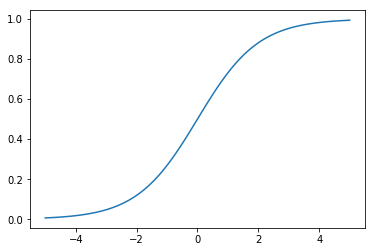

In [34]:
import matplotlib.pyplot as plt

# This is only needed in Jupyter notebooks!  Displays the plots for us.
%matplotlib inline 

plt.plot(x, f); # Use the semicolon to suppress some iPython output (not needed in real Python scripts)

Wonderful!  We have a plot.  It's terribly ugly and uninformative.  Let's clean it up a bit by putting some labels on it.

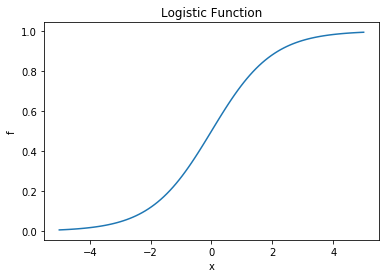

In [35]:
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f')
plt.title('Logistic Function');

Okay, it's getting better.  Still super ugly.  I see these kinds of plots at conferences all the time.  Unreadable.  We can do better.  Much, much better.  First, let's throw on a grid.

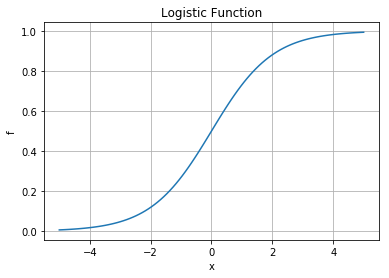

In [36]:
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f')
plt.title('Logistic Function')
plt.grid(True)

At this point, our plot is starting to get a little better but also a little crowded.

#### A note on gridlines
Gridlines can be very helpful in many scientific disciplines.  They help the reader quickly pick out important points and limiting values.  On the other hand, they can really clutter the plot.  Some people recommend never using gridlines, while others insist on them being present.  The correct approach is probably somewhere in between.  Use gridlines when necessary, but dispense with them when they take away more than they provide.  Ask yourself if they help bring out some important conclusion from the plot.  If not, then best just keep them away.

Before proceeding any further, I'm going to change notation.  The plotting interface we've been working with so far is okay, but not as flexible as it can be.  In fact, I don't usually generate my plots with this interface.  I work with slightly lower-level methods, which I will introduce to you now.  The reason I need to make a big deal about this is because the lower-level methods have a slightly different API.  This will become apparent in my next example.

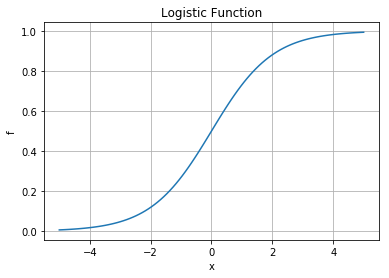

In [37]:
fig, ax = plt.subplots(1,1) # Get figure and axes objects

ax.plot(x, f) # Make a plot

# Create some labels
ax.set_xlabel('x')
ax.set_ylabel('f')
ax.set_title('Logistic Function')

# Grid
ax.grid(True)

Wow, it's *exactly* the same plot!  Notice, however, the use of `ax.set_xlabel()` instead of `plt.xlabel()`.  The difference is tiny, but you should be aware of it.  I will use this plotting syntax from now on.

What else do we need to do to make this figure better?  Here are some options:
* Make labels bigger!
* Make line fatter
* Make tick mark labels bigger
* Make the grid less pronounced
* Make figure bigger

Let's get to it.

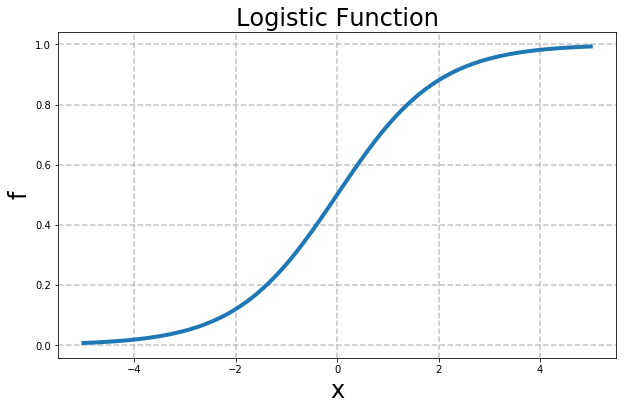

In [38]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) # Make figure bigger

ax.plot(x, f, lw=4) # Linewidth bigger
ax.set_xlabel('x', fontsize=24) # Fontsize bigger
ax.set_ylabel('f', fontsize=24) # Fontsize bigger
ax.set_title('Logistic Function', fontsize=24) # Fontsize bigger
ax.grid(True, lw=1.5, ls='--', alpha=0.75) # Update grid

Notice:
* `lw` stands for `linewidth`.  We could also write `ax.plot(x, f, linewidth=4)`
* `ls` stands for `linestyle`.
* `alpha` stands for transparency.

Things are looking good now!  Unfortunately, people still can't read the tick mark labels.  Let's remedy that presently.

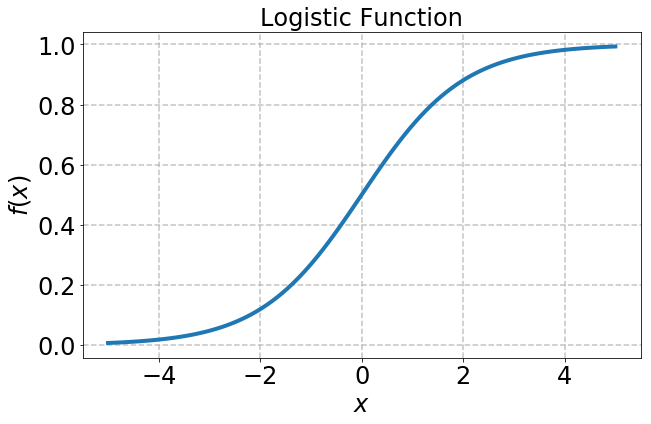

In [39]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) # Make figure bigger

# Make line plot
ax.plot(x, f, lw=4)

# Update ticklabel size
ax.tick_params(labelsize=24)

# Make labels
ax.set_xlabel(r'$x$', fontsize=24) # Use TeX for mathematical rendering
ax.set_ylabel(r'$f(x)$', fontsize=24) # Use TeX for mathematical rendering
ax.set_title('Logistic Function', fontsize=24)

ax.grid(True, lw=1.5, ls='--', alpha=0.75)

The only thing remaining to do is to change the $x$ limits.  Clearly these should go from $-5$ to $5$.

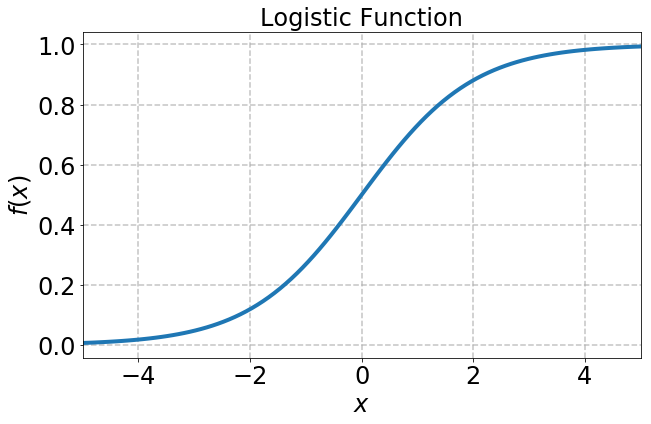

In [40]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) # Make figure bigger

# Make line plot
ax.plot(x, f, lw=4)

# Set axes limits
ax.set_xlim(x.min(), x.max())

# Update ticklabel size
ax.tick_params(labelsize=24)

# Make labels
ax.set_xlabel(r'$x$', fontsize=24) # Use TeX for mathematical rendering
ax.set_ylabel(r'$f(x)$', fontsize=24) # Use TeX for mathematical rendering
ax.set_title('Logistic Function', fontsize=24)

ax.grid(True, lw=1.5, ls='--', alpha=0.75)

You can play around with figures forever making them perfect.  At this point, everyone can read and interpret this figure just fine.  Don't spend your life making the perfect figure.  Make it good enough so that you can convey your point to your audience.  Then save if it for later.

In [41]:
fig.savefig('logistic.png')

Done!  Let's take a look.
![](logistic.png)

#### Resources
If you want to see all the styles available, please take a look at the documentation.
* [Line styles](https://matplotlib.org/2.0.1/api/lines_api.html#matplotlib.lines.Line2D.set_linestyle)
* [Marker styles](https://matplotlib.org/2.0.1/api/markers_api.html#module-matplotlib.markers)
* [Everything you could ever want](https://matplotlib.org/2.0.1/api/lines_api.html#matplotlib.lines.Line2D.set_marker)

We haven't discussed it yet, but you can also put a legend on a figure.  You'll do that in the next exercise.  Here are some additional resources:
* [Legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html)
* [Grid](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.grid.html)

<div class="exercise"><b>Exercise</b></div>

Do the following:
* Make a figure with the logistic function, hyperbolic tangent, and rectified linear unit.
* Use different line styles for each plot
* Put a legend on your figure

Here's an example of a figure:
![](nice_plots.png)

You don't need to make the exact same figure, but it should be just as nice and readable.

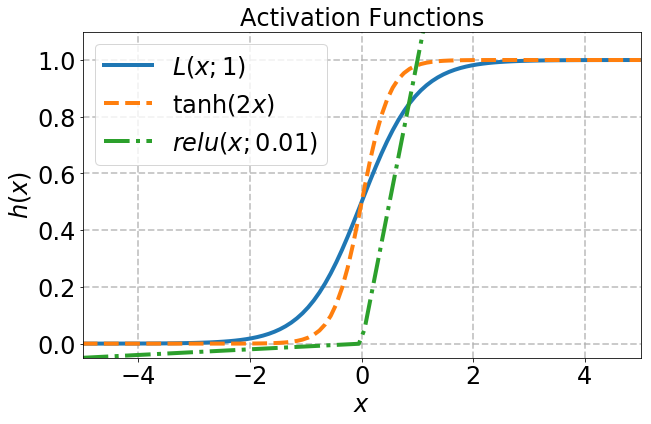

In [42]:
# your code here

# First get the data
f = logistic(x, 2.0, 1.0)
g = stretch_tanh(x, 2.0, 0.5, 0.5)
h = relu(x)

fig, ax = plt.subplots(1,1, figsize=(10,6)) # Create figure object

# Make actual plots
# (Notice the label argument!)
ax.plot(x, f, lw=4, ls='-', label=r'$L(x;1)$')
ax.plot(x, g, lw=4, ls='--', label=r'$\tanh(2x)$')
ax.plot(x, h, lw=4, ls='-.', label=r'$relu(x; 0.01)$')

# Make the tick labels readable
ax.tick_params(labelsize=24)

# Set axes limits to make the scale nice
ax.set_xlim(x.min(), x.max())
ax.set_ylim(h.min(), 1.1)

# Make readable labels
ax.set_xlabel(r'$x$', fontsize=24)
ax.set_ylabel(r'$h(x)$', fontsize=24)
ax.set_title('Activation Functions', fontsize=24)

# Set up grid
ax.grid(True, lw=1.75, ls='--', alpha=0.75)

# Put legend on figure
ax.legend(loc='best', fontsize=24);

fig.savefig('nice_plots.png')

There a many more things you can do to the figure to spice it up.  Remember, there must be a tradeoff between making a figure look good and the time you put into it.  

**The guiding principle should be that your audience needs to easily read and understand your figure.**

There are of course other types of figures including, but not limited to, 
* Scatter plots (you will use these all the time)
* Bar charts
* Histograms
* Contour plots
* Surface plots
* Heatmaps

There is documentation on each one of these.  You should feel comforatable enough with the plotting API now to dig in and make readable, understandable plots.

Before moving on, we will discuss another way to make your plots look good without all the hassle.  I'll make a beautiful plot without having to specify annoying arguments every single time.

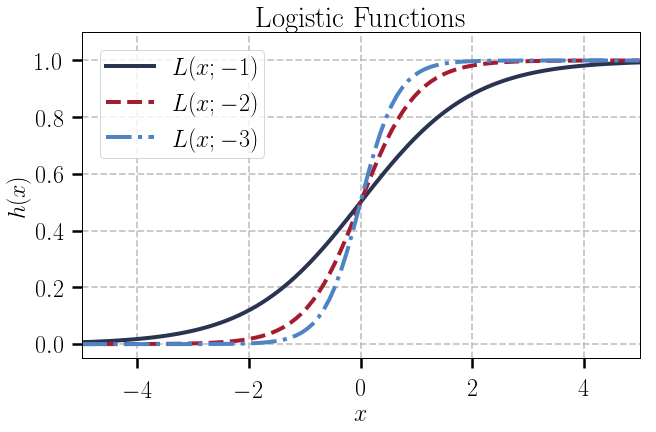

In [43]:
import config # User-defined config file
plt.rcParams.update(config.pars) # Update rcParams to make nice plots

# First get the data
f1 = logistic(x, 1.0, 1.0)
f2 = logistic(x, 2.0, 1.0)
f3 = logistic(x, 3.0, 1.0)

fig, ax = plt.subplots(1,1, figsize=(10,6)) # Create figure object

# Make actual plots
# (Notice the label argument!)
ax.plot(x, f1, ls='-', label=r'$L(x;-1)$')
ax.plot(x, f2, ls='--', label=r'$L(x;-2)$')
ax.plot(x, f3, ls='-.', label=r'$L(x;-3)$')

# Set axes limits to make the scale nice
ax.set_xlim(x.min(), x.max())
ax.set_ylim(h.min(), 1.1)

# Make readable labels
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$h(x)$')
ax.set_title('Logistic Functions')

# Set up grid
ax.grid(True, lw=1.75, ls='--', alpha=0.75)

# Put legend on figure
ax.legend(loc='best')

That's a good-looking plot!  Notice that we didn't need to have all those annoying `fontsize` specifications floating around.  If you want to reset the defaults, just use `plt.rcdefaults()`.

Now, how in the world did this work?  Obviously, there is something special about the `config` file.  I didn't give you a config file, but the next exercise requires you to create one.

<div class="exercise"><b>Exercise</b></div>
* Read the *matplotlib rcParams* section at the following page: [Customizing matplotlib](https://matplotlib.org/users/customizing.html)
* Create your very own `config.py` file.  It should have the following structure:
```python
pars = {}
```
You must fill in the `pars` dictionary yourself.  All the possible parameters can be found at the link above.  For example, if you want to set a default line width of `4`, then you would have 
```python
pars = {'lines.linewidth': 4}
```
  in your `config.py` file.
* Make sure your `config.py` file is in the same directory as your lab notebook.
* Make a plot (similar to the one I made above) using your `config` file.

### `seaborn`
Early on in this plotting section, I mentioned `seaborn`.  You can use `seaborn` to make very nice plots of statistical data.  Here is the main website:  [seaborn: statistical data visualization](https://seaborn.pydata.org/).

We won't dive deep into `seaborn` here.  It is quite popular in the data science community, but it is ultimately up to you whether or not you choose to use it.

`seaborn` works great with `pandas`.  It can also be customized easily.  Here is the basic `seaborn` tutorial: [Seaborn tutorial](https://seaborn.pydata.org/tutorial.html).

### No Excuses
With all of these resourses, there is no reason to have a bad figure. EVER.

Now we'll move on to some data analysis.

## Part 3:  Simple Linear Regression
Linear regression and its many extensions are a workhorse of the statistics and data science community, both in application and as a reference point for other models. Most of the major concepts in machine learning can be and often are discussed in terms of various linear regression models. Thus, this section will introduce you to building and fitting linear regression models and some of the process behind it, so that you can 1) fit models to data you encounter 2) experiment with different kinds of linear regression and observe their effects 3) see some of the technology that makes regression models work.


### Part 3.1: Linear regression with a toy dataset
We first examine a toy problem, focusing our efforts on fitting a linear model to a small dataset with three observations.  Each observation consists of one predictor $x_i$ and one response $y_i$ for $i = 1, 2, 3$,

\begin{align*}
(x , y) = \{(x_1, y_1), (x_2, y_2), (x_3, y_3)\}.
\end{align*}

To be very concrete, let's set the values of the predictors and responses.

\begin{equation*}
(x , y) = \{(1, 2), (2, 2), (3, 4)\}
\end{equation*}

There is no line of the form $\beta_0 + \beta_1 x = y$ that passes through all three observations, since the data are not collinear. Thus our aim is to find the line that best fits these observations in the *least-squares sense*, as discussed in lecture.

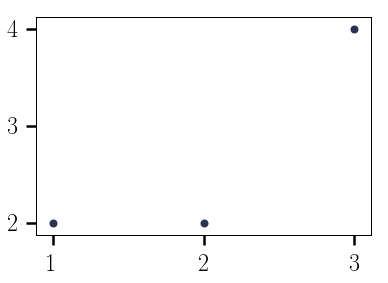

In [44]:
x_data = [1,2,3]
y_data = [2,2,4]
plt.scatter(x_data,y_data);


#### Formulae
Linear regression is special among the models we study beuase it can be solved explicitly. While most other models (and even some advanced versions of linear regression) must be solved itteratively, linear regression has a formula where you can simply plug in the data.

For the single predictor case it is:
    \begin{align}
      \beta_1 &= \frac{\sum_{i=1}^n{(x_i-\bar{x})(y_i-\bar{y})}}{\sum_{i=1}^n{(x_i-\bar{x})^2}}\\
      \beta_0 &= \bar{y} - \beta_1\bar{x}\
    \end{align}
    
Where $\bar{y}$ and $\bar{x}$ are the mean of the y values and the mean of the x values, respectively.


In words, 
    \begin{align}
      \text{optimal slope} &= \frac{\sum_{\text{all observations}}{(\text{x's deviation from mean})(\text{y's deviation from mean})}}{\sum_{\text{all observations}}{\text{x's squared deviation from mean}}}\\
      \text{opimal intercept} &= \text{mean y} - \text{optimal slope}\cdot\text{mean x}\
    \end{align}


In statistics:
    \begin{align}
      \beta_1 &= \frac{Cov(x,y)}{Var(x)}\\
      \bar{y} &= \beta_0 + \beta_1\bar{x}\
    \end{align}

From the re-aranged second equation we can see that the best-fit line  passes through $(\bar{x},\bar{y})$, the center of mass of the data

From any of the first equations, we can see that the slope of the line has to do with whether or not an x value that is above/below the center of mass is typically paired with a y value that is likewise above/below, or typically paired with one that is opposite.

Right now, the derivation of $\beta_{0}$ and $\beta_{1}$ is a mystery.  Don't worry about this!  You will see where they come from in lecture next week.  In this lab, you will simply implement the simple formulas for $\beta_{0}$ and $\beta_{1}$.

### Part 3.2: Building a model from scratch
In this part, we will solve the equations for simple linear regression and find the best fit solution to our toy problem.

The snippets of code below implement the linear regression equations on the observed predictors and responses, which we'll call the training data set.  Let's walk through the code.

In [45]:
# observed predictors
x_train = np.array([1, 2, 3])
y_train = np.array([2, 2, 4])

# check dimensions 
print(x_train.shape,y_train.shape)

(3,) (3,)


In [46]:
# Reshape to be a proper 2D array
x_train = x_train.reshape(x_train.shape[0], 1)
y_train = y_train.reshape(y_train.shape[0], 1)

print(x_train.shape)

(3, 1)


In [47]:
# first, compute means
y_bar = np.mean(y_train)
x_bar = np.mean(x_train)

# build the two terms
numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
denominator = np.sum((x_train - x_bar)**2)

print(numerator.shape, denominator.shape) #check shapes

() ()


The numerator and denominator are scalars, as expected.

In [48]:
#slope beta1
beta_1 = numerator/denominator

#intercept beta0
beta_0 = y_bar - beta_1*x_bar

print("The best-fit line is {0:8.6f} + {1:8.6f} * x".format(beta_0, beta_1))

The best-fit line is 0.666667 + 1.000000 * x


<div class="exercise"><b>Exercise</b></div>
Turn the code from the above cells into a function called `simple_linear_regression_fit`, that inputs the training data and returns `beta0` and `beta1`.

To do this, copy and paste the code from the above cells below and adjust the code as needed, so that the training data becomes the input and the betas become the output.

```python
def simple_linear_regression_fit(x_train: np.ndarray, y_train: np.ndarray) -> np.ndarray:
    
    return
```

Check your function by calling it with the training data from above and printing out the beta values.

In [49]:
# Your code here
def simple_linear_regression_fit(x_train: np.ndarray, y_train: np.ndarray) -> np.ndarray:
    """
    Inputs:
    x_train: a (num observations by 1) array holding the values of the predictor variable
    y_train: a (num observations by 1) array holding the values of the response variable

    Returns:
    beta_vals:  a (num_features by 1) array holding the intercept and slope coeficients
    """
    
    # Check input array sizes
    if len(x_train.shape) < 2:
        print("WARNING: Reshaping features array.")
        x_train = x_train.reshape(x_train.shape[0], 1)

    if len(y_train.shape) < 2:
        print("WARNING: Reshaping observations array.")
        y_train = y_train.reshape(y_train.shape[0], 1)

    # first, compute means
    y_bar = np.mean(y_train)
    x_bar = np.mean(x_train)

    # build the two terms
    numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
    denominator = np.sum((x_train - x_bar)**2)
    
    #slope beta1
    beta_1 = numerator/denominator

    #intercept beta0
    beta_0 = y_bar - beta_1*x_bar

    return np.array([beta_0,beta_1])

In [50]:
x_train = np.array([1 ,2, 3])
y_train = np.array([2, 2, 4])

betas = simple_linear_regression_fit(x_train, y_train)

beta_0 = betas[0]
beta_1 = betas[1]

print("The best-fit line is {0:8.6f} + {1:8.6f} * x".format(beta_0, beta_1))

The best-fit line is 0.666667 + 1.000000 * x


<div class="exercise"><b>Exercise</b></div>
* Plot the training data using a scatter plot.
* Do the values of `beta0` and `beta1` seem reasonable?
* Plot the best fit line with `beta0` and `beta1` together with the training data.

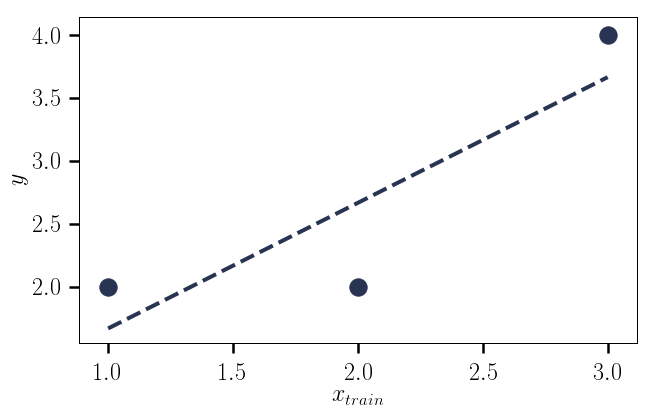

In [51]:
# Your code here
fig_scat, ax_scat = plt.subplots(1,1, figsize=(10,6))

# Plot best-fit line
x_train = np.array([[1, 2, 3]]).T

best_fit = beta_0 + beta_1 * x_train

ax_scat.scatter(x_train, y_train, s=300, label='Training Data')
ax_scat.plot(x_train, best_fit, ls='--', label='Best Fit Line')

ax_scat.set_xlabel(r'$x_{train}$')
ax_scat.set_ylabel(r'$y$');

The values of `beta0` and `beta1` seem roughly reasonable.  They capture the positive correlation.  The line does appear to be trying to get as close as possible to all the points.

### 3.3: Building a model with `statsmodels` and `sklearn`

Now that we can concretely fit the training data from scratch, let's learn two `python` packages to do it all for us:
* [statsmodels](http://www.statsmodels.org/stable/regression.html) and 
* [scikit-learn (sklearn)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Our goal  is to show how to implement simple linear regression with these packages.  For an important sanity check, we compare the $\beta$ values from `statsmodels` and `sklearn` to the $\beta$ values that we found from above with our own implementation.

For the purposes of this lab, `statsmodels` and `sklearn` do the same thing.  More generally though, `statsmodels` tends to be easier for inference \[finding the values of the slope and intercept and dicussing uncertainty in those values\], whereas `sklearn` has machine-learning algorithms and is better for prediction \[guessing y values for a given x value\]. (Note that both packages make the same guesses, it's just a question of which activity they provide more support for.

**Note:** `statsmodels` and `sklearn` are different packages!  Unless we specify otherwise, you can use either one.

Below is the code for `statsmodels`.  `Statsmodels` does not by default include the column of ones in the $X$ matrix, so we include it manually with `sm.add_constant`.

In [52]:
import statsmodels.api as sm

/Users/dsondak/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [53]:
# create the X matrix by appending a column of ones to x_train
X = sm.add_constant(x_train)

# this is the same matrix as in our scratch problem!
print(X)

# build the OLS model (ordinary least squares) from the training data
toyregr_sm = sm.OLS(y_train, X)

# do the fit and save regression info (parameters, etc) in results_sm
results_sm = toyregr_sm.fit()

# pull the beta parameters out from results_sm
beta0_sm = results_sm.params[0]
beta1_sm = results_sm.params[1]

print("The regression coefficients from the statsmodels package are: beta_0 = {0:8.6f} and beta_1 = {1:8.6f}".format(beta0_sm, beta1_sm))
# print("(beta0, beta1) = (%f, %f)" %(beta0_sm, beta1_sm))

[[1. 1.]
 [1. 2.]
 [1. 3.]]
The regression coefficients from the statsmodels package are: beta_0 = 0.666667 and beta_1 = 1.000000


Besides the beta parameters, `results_sm` contains a ton of other potentially useful information.

Now let's turn our attention to the `sklearn` library.

In [54]:
from sklearn import linear_model

In [55]:
# build the least squares model
toyregr_skl = linear_model.LinearRegression()

# save regression info (parameters, etc) in results_skl
results_skl = toyregr_skl.fit(x_train, y_train)

# pull the beta parameters out from results_skl
beta0_skl = toyregr_skl.intercept_
beta1_skl = toyregr_skl.coef_[0]

print("The regression coefficients from the sklearn package are: beta_0 = {0:8.6f} and beta_1 = {1:8.6f}".format(beta0_skl, beta1_skl))

The regression coefficients from the sklearn package are: beta_0 = 0.666667 and beta_1 = 1.000000


We should feel pretty good about ourselves now, and we're ready to move on to a real problem!

### 3.4:  The shape of things in `scikit-learn`
Before diving right in to a "real" problem, we really ought to discuss more of the details of `sklearn`.  We do this now.  Along the way, we'll import the real-world dataset.

`Scikit-learn` is the main `python` machine learning library. It consists of many learners which can learn models from data, as well as a lot of utility functions such as `train_test_split`. It can be used in `python` by the incantation `import sklearn`.

The library has a very well-defined interface. This makes the library a joy to use, and surely contributes to its popularity.  The API consists of three interfaces:
1. estimator interface: builds and fits models
   * This interface is at the core of the library
   * Provides the `fit()` method
   * Unsupervised and supervised learning algorithms can be accessed from the estimator interface
2. predictor interface: makes predictions
3. transformer interface: converts data

You can refer to the original `scikit-learn` API paper for more details: [Buitinck, Lars, et al. "API design for machine learning software: experiences from the scikit-learn project." arXiv preprint arXiv:1309.0238 (2013).]

Let's see the structure of `scikit-learn` needed to make these fits. `.fit` always takes two arguments:
```python
  estimator.fit(Xtrain, ytrain)
```
We will consider two estimators in this lab: `LinearRegression` and `KNeighborsRegressor`.

Critically, `Xtrain` must be in the form of an *array of arrays*, with the inner arrays each corresponding to one sample, and whose elements correspond to the feature values for that sample (visuals coming in a moment).

`ytrain` on the other hand is a simple array of responses.  These are continuous for regression problems.

![](images/sklearn2.jpg)

#### Practice with `sklearn`
We begin by loading up the `mtcars` dataset and cleaning it up a little bit.

In [56]:
import pandas as pd

#load mtcars
dfcars = pd.read_csv("data/mtcars.csv")
dfcars = dfcars.rename(columns={"Unnamed: 0":"car name"})
dfcars.head()

,car name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Next, let's split the dataset into a training set and test set.

In [57]:
# split into training set and testing set
from sklearn.model_selection import train_test_split

#set random_state to get the same split every time
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

In [58]:
# testing set is around 20% of the total data; training set is around 80%
print("Shape of full dataset is: {0}".format(dfcars.shape))
print("Shape of training dataset is: {0}".format(traindf.shape))
print("Shape of test dataset is: {0}".format(testdf.shape))

Shape of full dataset is: (32, 12)
Shape of training dataset is: (25, 12)
Shape of test dataset is: (7, 12)


Now we have training and test data.  We still need to select a predictor and a response from this dataset.  Keep in mind that we need to choose the predictor and response from both the training and test set.  You will do this in the exercises below.  However, we provide some starter code for you to get things going.

In [59]:
# Extract the response variable that we're interested in
y_train = traindf.mpg

Notice the shape of `y_train`.

In [60]:
np.shape(y_train)

(25,)

Another way to see the shape is to use the shape method.

In [61]:
y_train.shape

(25,)

This is *not* an "array of arrays".  That's okay!  Remember, `sklearn` requires an array of arrays only for the predictor array!  You will have to pay close attention to this in the exercises later.

For now, let's discuss two ways out of this debacle.  All we'll do is get `y_train` to be an array of arrays.  This doesn't hurt anything because `sklearn` doesn't care too much about the shape of `y_train`.

First, let's reshape `y_train` to be an array of arrays using the `reshape` method.  We want the first dimension of `y_train` to be size $25$ and the second dimension to be size $1$.

In [62]:
y_train_reshape = y_train.values.reshape(y_train.shape[0], 1)

In [63]:
y_train_reshape.shape

(25, 1)

That was easy.  Notice that `y_train.shape[0]` gives the size of the first dimension.

Of course, there's an even easier way to get the correct shape right from the beginning.

In [64]:
y_train_reshape = traindf[['mpg']]

In [65]:
y_train_reshape.shape

(25, 1)

Finally, there is a nice shortcut to reshaping an array.  `numpy` can infer a dimension based on the other dimensions specified.

In [66]:
y_train_reshape = y_train.values.reshape(-1,1)
y_train_reshape.shape

(25, 1)

In this case, we said the second dimension should be size $1$.  Since the requirement of the `reshape()` method is that the requested dimensions be compatible, `numpy` decides the the first dimension must be size $25$.

What would the `.shape` return if we did `y_train.values.reshape(-1,5)`?

Okay, enough of that.  The whole reason we went through that whole process was to show you how to reshape your data into the correct format.

**IMPORTANT:** Remember that your response variable `ytrain` can be a vector but your predictor variable `xtrain` ***must*** be an array!

### Part 3.4: Simple linear regression with automobile data
We will now use `sklearn` to predict automobile mileage per gallon (mpg) and evaluate these predictions. We already loaded the data and split them into a training set and a test set.

We need to choose the variables that we think will be good predictors for the dependent variable `mpg`. 

<div class="exercise"><b>Exercise</b></div>
* Pick one variable to use as a predictor for simple linear regression.  Create a markdown cell below and discuss your reasons.  
* Justify your choice with some visualizations.  
* Is there a second variable you'd like to use? For example, we're not doing multiple linear regression here, but if we were, is there another variable you'd like to include if we were using two predictors?

Text(0,0.5,'Car MPG')

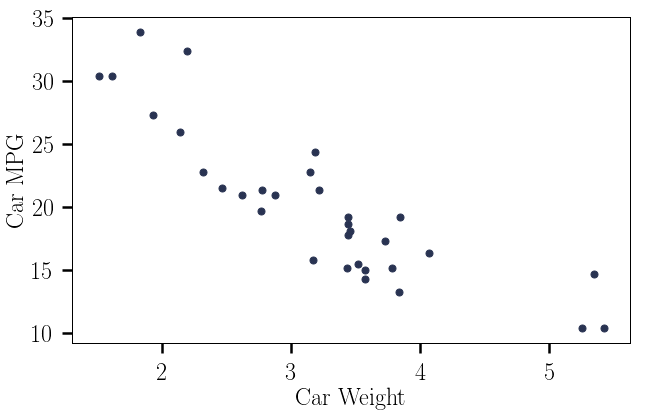

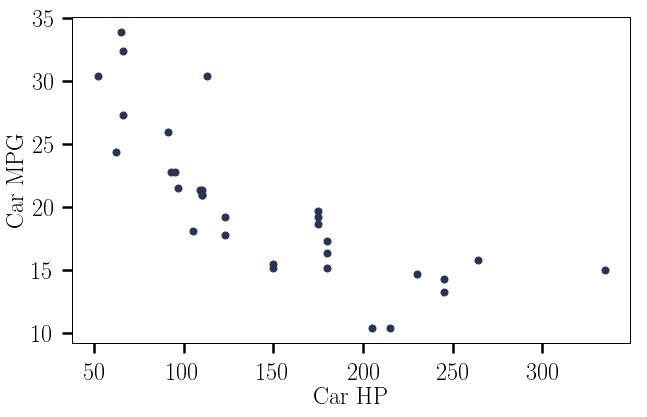

In [67]:
# Your code here
y_mpg = dfcars.mpg
x_wt = dfcars.wt
x_hp = dfcars.hp

fig_wt, ax_wt = plt.subplots(1,1, figsize=(10,6))
ax_wt.scatter(x_wt, y_mpg)
ax_wt.set_xlabel(r'Car Weight')
ax_wt.set_ylabel(r'Car MPG')

fig_hp, ax_hp = plt.subplots(1,1, figsize=(10,6))
ax_hp.scatter(x_hp, y_mpg)
ax_hp.set_xlabel(r'Car HP')
ax_hp.set_ylabel(r'Car MPG')

<div class="exercise"><b>Exercise</b></div>

* Use `sklearn` to fit the training data using simple linear regression.
* Use the model to make mpg predictions on the test set.  
* Plot the data and the prediction.  
* Print out the mean squared error for the training set and the test set and compare.

**Hints:**
* Use the following to perform the analysis:
```python
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
```

0.6879761857596272
0.7701379909791617
12.475985659918837
7.773697766387512
Coefficients: 
 -5.336941400557081 36.93731031351841


/Users/dsondak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/Users/dsondak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


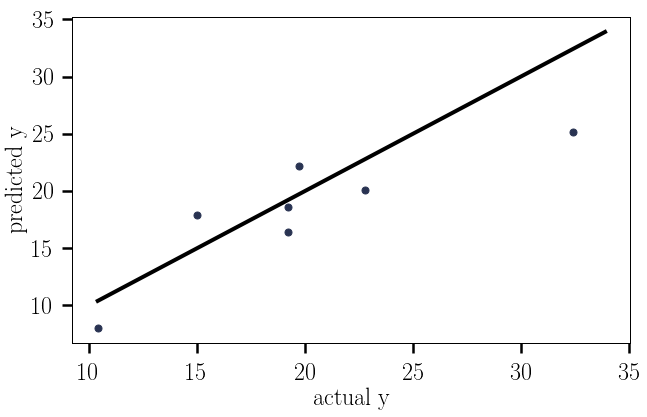

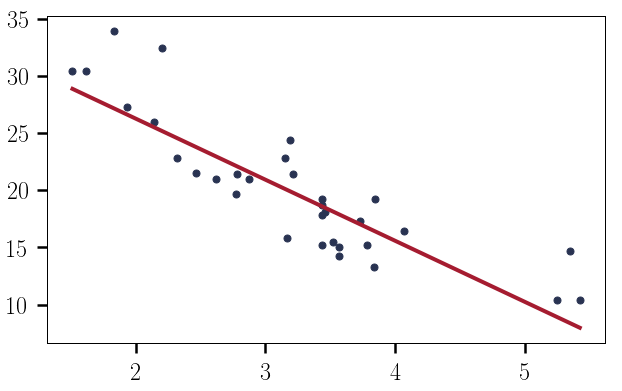

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

dfcars = pd.read_csv("data/mtcars.csv")
dfcars = dfcars.rename(columns={"Unnamed: 0":"name"})

dfcars.head()


traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

y_train = traindf.mpg
X_train = traindf.wt
X_train = X_train.reshape(X_train.shape[0], 1)

y_test = testdf.mpg
X_test = testdf.wt
X_test = X_test.reshape(X_test.shape[0], 1)

#create linear model
regression = LinearRegression()

#fit linear model
regression.fit(X_train, y_train)

predicted_y = regression.predict(X_test)

r2 = regression.score(X_test, y_test)
print(r2)

print(regression.score(X_train, y_train))

print(mean_squared_error(predicted_y, y_test))
print(mean_squared_error(y_train, regression.predict(X_train)))

print('Coefficients: \n', regression.coef_[0], regression.intercept_)


fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(y_test, predicted_y, 'o')
grid = np.linspace(np.min(dfcars.mpg), np.max(dfcars.mpg), 100)
ax.plot(grid, grid, color="black") # 45 degree line
ax.set_xlabel("actual y")
ax.set_ylabel("predicted y")

fig1, ax1 = plt.subplots(1,1, figsize=(10,6))
ax1.plot(dfcars.wt, dfcars.mpg, 'o')
xgrid = np.linspace(np.min(dfcars.wt), np.max(dfcars.wt), 100)
ax1.plot(xgrid, regression.predict(xgrid.reshape(100, 1)))

## Part 4:  $k$-nearest neighbors

Great, so we did a simple linear regression on the car data.

Because we're good data scientists, we decide that a $k$ nearest-neighbor regression should also be performed.

Now that you're familiar with the `sklearn` API, you're ready to do a KNN regression.  We can go a little quicker here.  Let's use $5$ nearest neighbors.

In [69]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors=5)

In [70]:
knnreg.fit(X_train, y_train)
r2 = knnreg.score(X_test, y_test)
r2

0.6992188728167332

<div class="exercise"><b>Exercise</b></div>
What is the $R^{2}$ score on the training set?

In [71]:
# Your code here
knnreg.score(X_train, y_train)

0.8718092469742431

Lets vary the number of neighbors and see what we get.

In [72]:
regdict = {}
# Do a bunch of KNN regressions
for k in [1, 2, 4, 6, 8, 10, 15]:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(X_train, y_train)
    regdict[k] = knnreg # Store the regressors in a dictionary

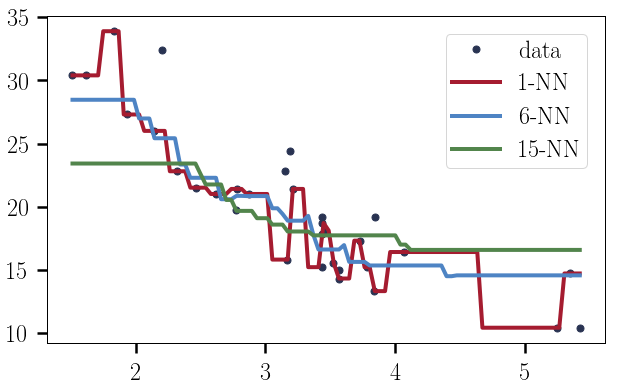

In [73]:
# Now let's plot it all
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(dfcars.wt, dfcars.mpg, 'o', label="data")

xgrid = np.linspace(np.min(dfcars.wt), np.max(dfcars.wt), 100)
for k in [1, 2, 6, 10, 15]:
    predictions = regdict[k].predict(xgrid.reshape(100,1))
    if k in [1, 6, 15]:
        ax.plot(xgrid, predictions, label="{}-NN".format(k))

ax.legend();

Notice how the $1$-NN goes through every point on the training set but utterly fails elsewhere. Lets look at the scores on the training set.

Text(0,0.5,'$R^{2}$')

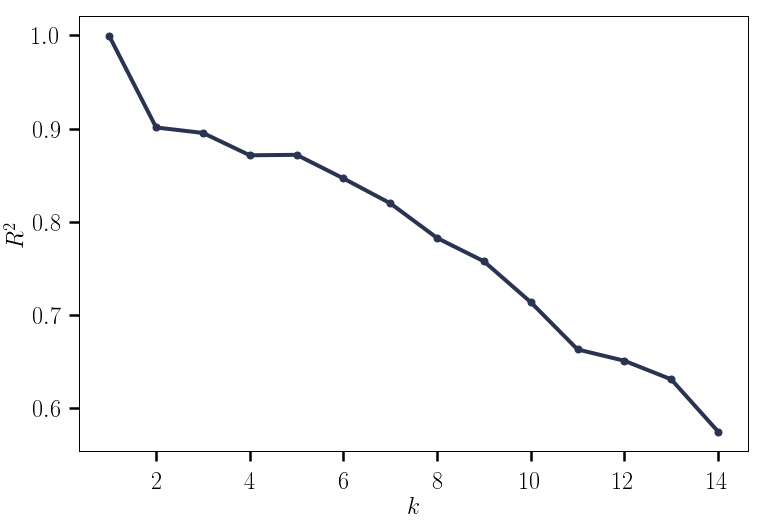

In [74]:
ks = range(1, 15) # Grid of k's
scores_train = [] # R2 scores
for k in ks:
    knnreg = KNeighborsRegressor(n_neighbors=k) # Create KNN model
    knnreg.fit(X_train, y_train) # Fit the model to training data
    score_train = knnreg.score(X_train, y_train) # Calculate R^2 score
    scores_train.append(score_train)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, scores_train,'o-')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')

Why do we get a perfect $R^2$ at k=1?

<div class="exercise"><b>Exercise</b></div>
* Make the same plot as above on the *test* set.
* What is the best $k$?

Text(0,0.5,'$R^{2}$')

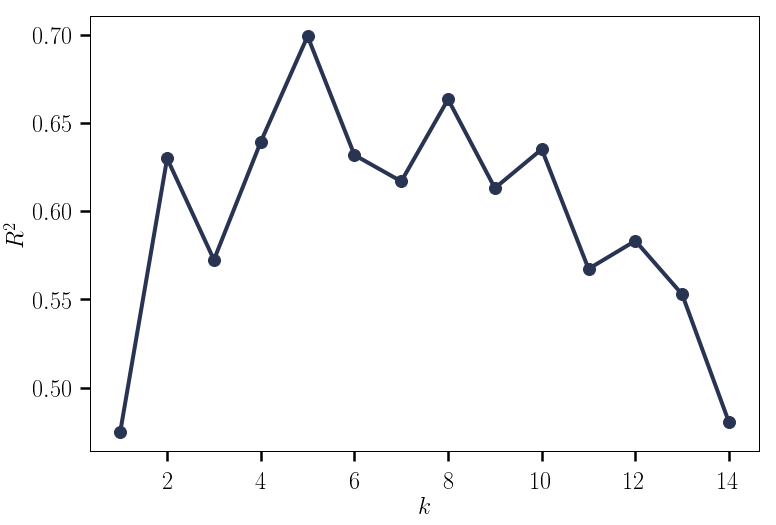

In [75]:
# Your code here
ks = range(1, 15) # Grid of k's
scores_test = [] # R2 scores
for k in ks:
    knnreg = KNeighborsRegressor(n_neighbors=k) # Create KNN model
    knnreg.fit(X_train, y_train) # Fit the model to training data
    score_test = knnreg.score(X_test, y_test) # Calculate R^2 score
    scores_test.append(score_test)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, scores_test,'o-', ms=12)
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')